In [4]:
import pandas as pd
import numpy as np

In [30]:

df = pd.read_csv("/Users/ashishsharma/Desktop/student/student-mat.csv",sep=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [34]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [36]:
X = df.drop(["G3"], axis=1)
y = np.where(df["G3"] >= 10, 1, 0)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [56]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [58]:
print("=== Decision Tree Results ===")
print("Accuracy:", acc_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

=== Decision Tree Results ===
Accuracy: 0.8860759493670886
[[23  4]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79



In [60]:
print("\n=== Naive Bayes Results ===")
print("Accuracy:", acc_nb)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes Results ===
Accuracy: 0.8734177215189873
[[21  6]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.89      0.92      0.91        52

    accuracy                           0.87        79
   macro avg       0.86      0.85      0.86        79
weighted avg       0.87      0.87      0.87        79



In [62]:
models = ['Decision Tree', 'Naive Bayes']
accuracies = [acc_dt, acc_nb]

Text(0, 0.5, 'Accuracy Score')

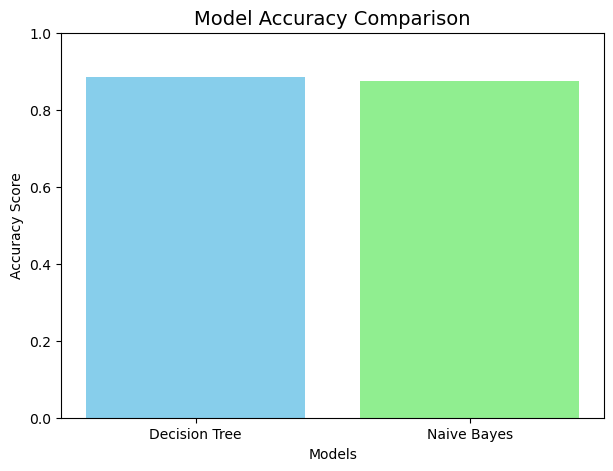

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

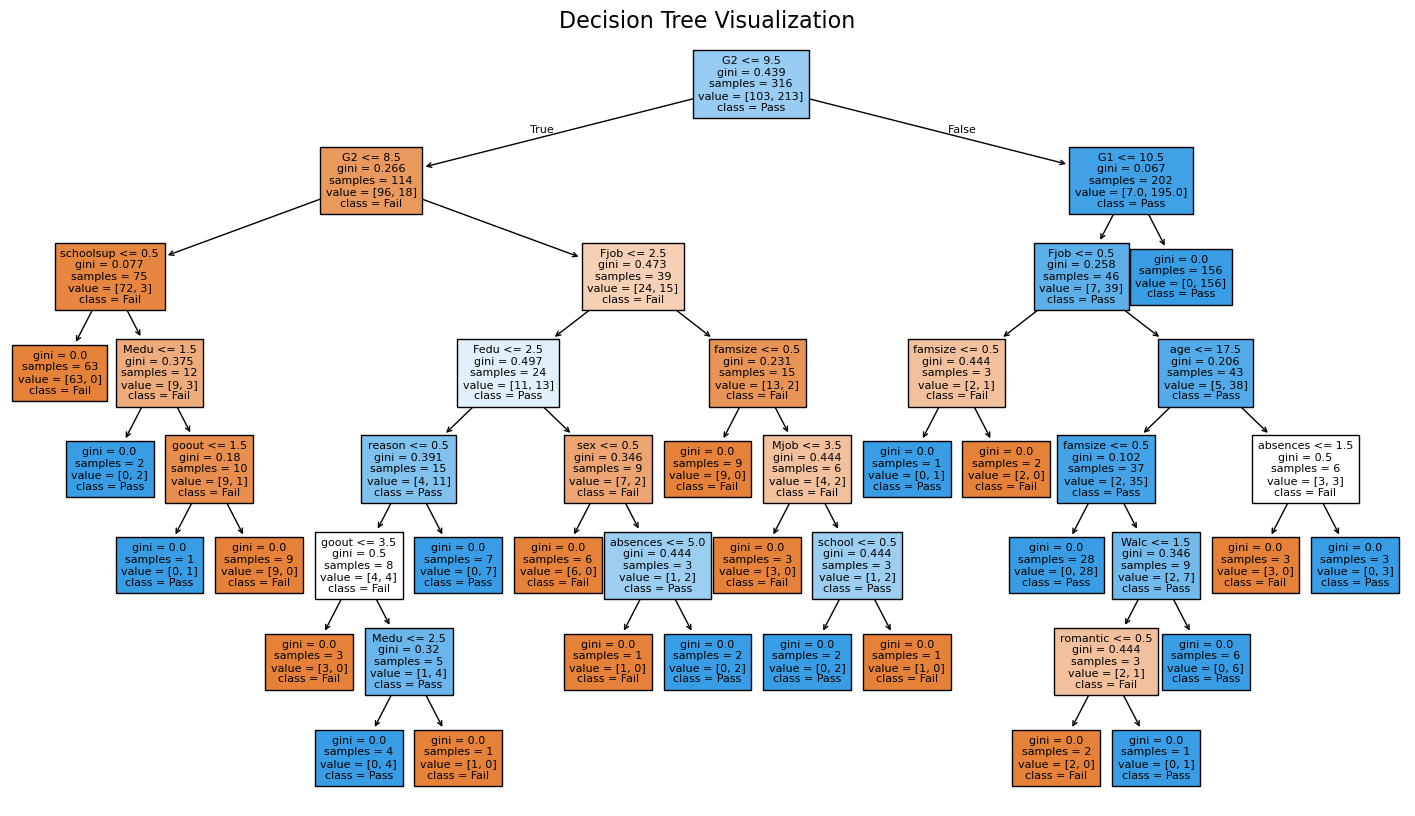

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
tree.plot_tree(dt, 
               feature_names=X.columns, 
               class_names=["Fail", "Pass"], 
               filled=True, 
               fontsize=8)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()